In [1]:
import wordcloud
import nltk
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re 
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob
import os

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from google.colab import files
files.upload()

Saving fulldeppdata.csv to fulldeppdata.csv
Saving fullhearddata.csv to fullhearddata.csv
Saving fulltrialdata.csv to fulltrialdata.csv


In [5]:
files=['fulldeppdata.csv', 'fullhearddata.csv', 'fulltrialdata.csv']

#Initalize an empty data frame
all_data = pd.DataFrame()

#iterate through files and their contents, then concatenate their data into the data frame initialized above
for f in files:
   data = pd.read_csv(f, low_memory = False)
   all_data = pd.concat([all_data, data])

#reindexing the dataframe as concattination leaded to duplicated indexes from multiple files
new_index = [i for i in range(len(all_data))]
all_data.index = new_index

In [6]:
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+',"",str(text)) #removing @ strings
  text = re.sub(r'#','',str(text)) #removing #
  text = re.sub(r'RT[\s]+','',str(text)) #removing re-tweets
  text = re.sub(r'http\S+|https\S+','',str(text)) #removing links
  text = re.sub('\n', '', text) #removing \n
  text = [word for word in text.split(' ') if word not in stopwords.words()] #removing stopwords
  text=" ".join(text)
  text = [stem(word) for word in text.split(' ')] #stemming
  text=" ".join(text)

  return text

In [7]:
def stem(text):
  # This function is used to stem the given sentence
  porter = PorterStemmer()
  token_words = word_tokenize(text)
  stem_sentence = []
  for word in token_words:
    stem_sentence.append(porter.stem(word))
  return " ".join(stem_sentence)

In [8]:
def sentiment(cleaned_text):
  # Returns the sentiment based on the polarity of the input TextBlob object
  if TextBlob(cleaned_text).sentiment.polarity > 0:
    return 'positive'
  elif TextBlob(cleaned_text).sentiment.polarity < 0:
    return 'negative'
  else:
    return 'neutral'

In [9]:
def polarity(cleaned_text):
    return TextBlob(cleaned_text).sentiment.polarity

In [10]:
def subjectivity(cleaned_text):
    return TextBlob(cleaned_text).sentiment.subjectivity

In [11]:
df = pd.DataFrame(columns=['Tweets', 'Clean Tweets', 'Sentiment', 'Polarity', 'Subjectivity'])
df['Tweets'] = all_data['text']

In [18]:
df['Clean Tweets'] = df['Tweets'].apply(cleanText)

In [19]:
df['Sentiment'] = df['Clean Tweets'].apply(sentiment)

In [20]:
df['Polarity'] = df['Clean Tweets'].apply(polarity)

In [22]:
df['Subjectivity'] = df['Clean Tweets'].apply(subjectivity)

In [23]:
# Dropping the duplicate values just in case there are some tweets that are copied and then stores the data in a csv file
df = df.drop_duplicates(subset='Clean Tweets')
df.to_csv('data.csv', index= False)
ptweets = df[df['Sentiment'] == 'positive']
p_perc = 100 * len(ptweets)/len(df['Tweets'])
ntweets = df[df['Sentiment'] == 'negative']
n_perc = 100 * len(ntweets)/len(df['Tweets'])
print(f'Positive tweets {p_perc} %')
print(f'Neutral tweets {100 - p_perc - n_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 31.206713154473466 %
Neutral tweets 47.479021392270425 %
Negative tweets 21.314265453256116 %


* Exploratory Data Analysis

In [24]:
df.shape

(42305, 5)

In [25]:
df['Sentiment'].value_counts()

neutral     20086
positive    13202
negative     9017
Name: Sentiment, dtype: int64

**Bar Graph**(Of all the Sentiments in Tweets)

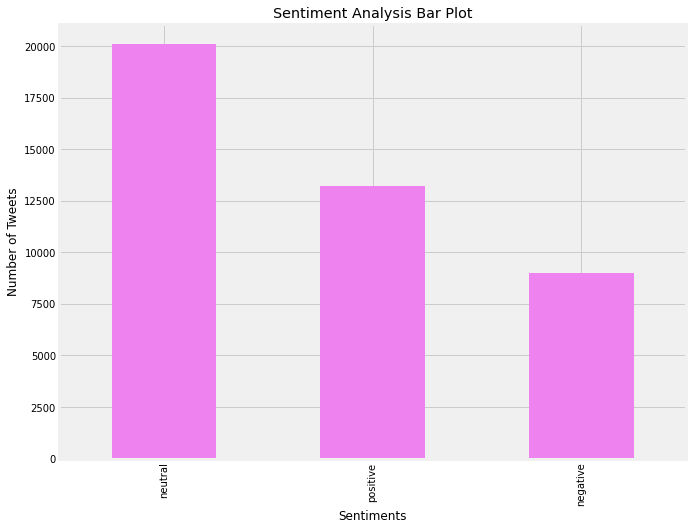

In [26]:
plt.figure(figsize=(10,8))
df['Sentiment'].value_counts().plot(kind = 'bar', color='violet')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiments')
plt.ylabel('Number of Tweets')
plt.show()

**WordCloud**(All Tweets)

(-0.5, 1999.5, 999.5, -0.5)

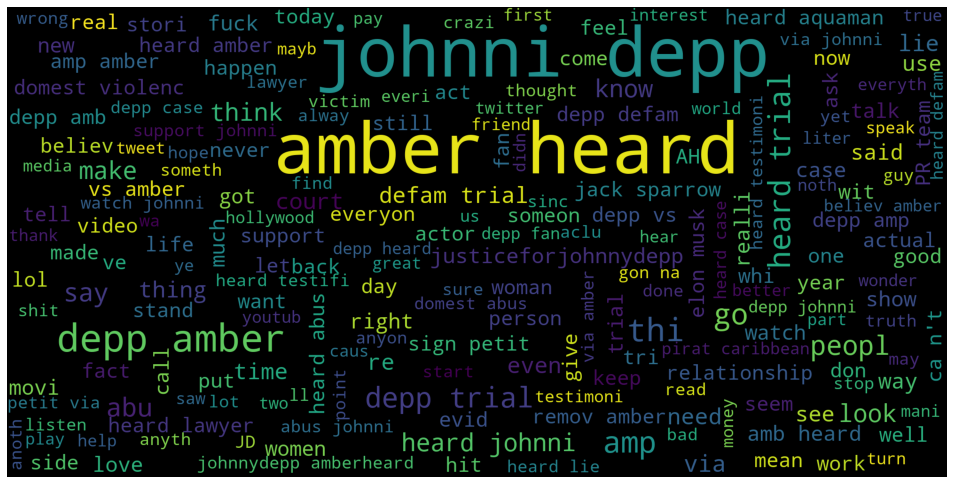

In [27]:
allTweet = ' '.join([i for i in df['Clean Tweets']])
plt.figure(figsize=(15, 9))
wordcloud = WordCloud(width=2000, height=1000, max_font_size=150).generate(allTweet)
plt.imshow(wordcloud)
plt.axis('off')

**WordCloud**(For Positive Tweets)

(-0.5, 1999.5, 999.5, -0.5)

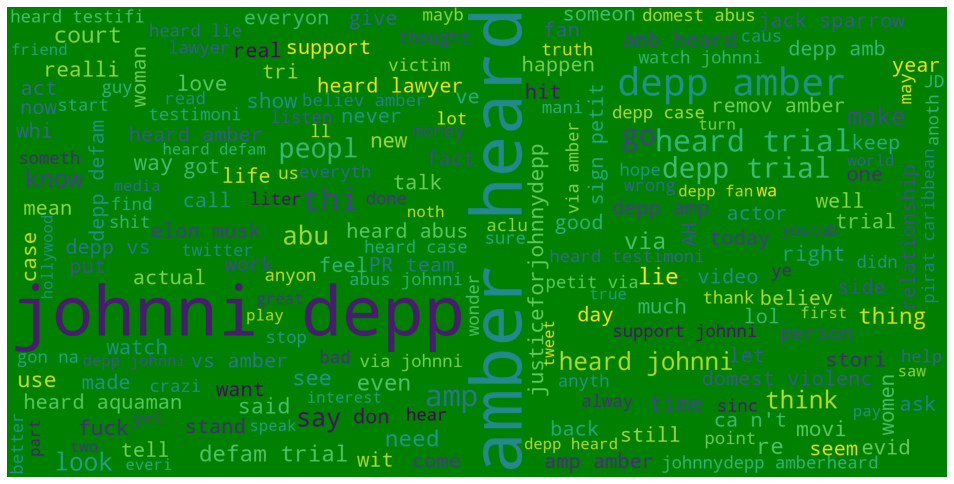

In [28]:
positiveTweet = ' '.join(i for i in df['Clean Tweets'][df['Sentiment'] == 'positive'])
plt.figure(figsize=(15, 9))
wordcloud = WordCloud(width=2000, height=1000, max_font_size=150, background_color='green').generate(allTweet)
plt.imshow(wordcloud)
plt.axis('off')

**WordCloud**(For Negative Tweets)

(-0.5, 1999.5, 999.5, -0.5)

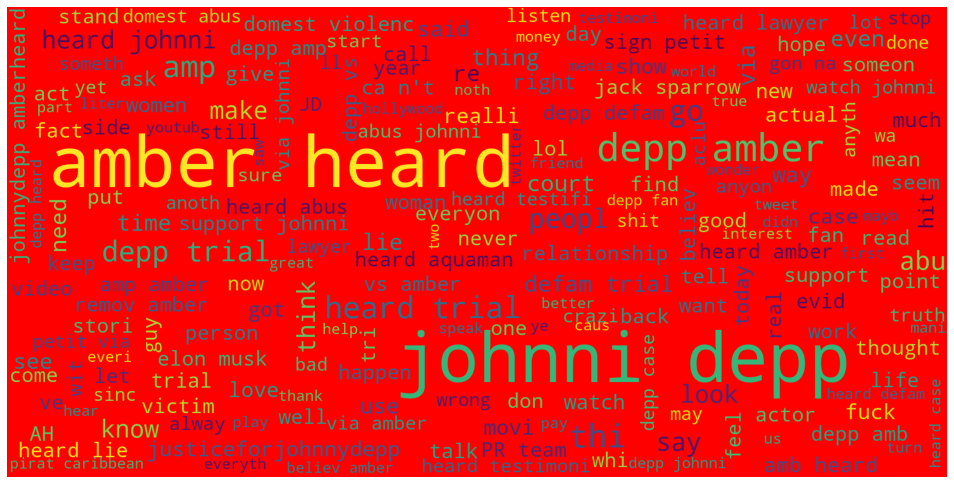

In [29]:
positiveTweet = ' '.join(i for i in df['Clean Tweets'][df['Sentiment'] == 'negative'])
plt.figure(figsize=(15, 9))
wordcloud = WordCloud(width=2000, height=1000, max_font_size=150, background_color='red').generate(allTweet)
plt.imshow(wordcloud)
plt.axis('off')

**ScatterPlot**(For All Tweets)

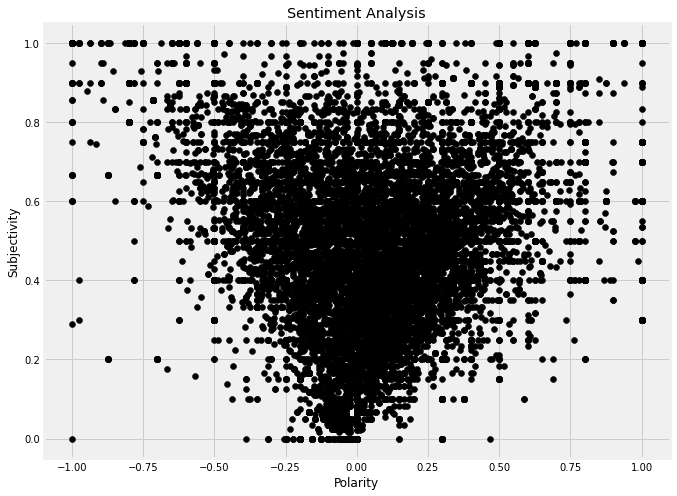

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(df['Polarity'],df['Subjectivity'],color='black')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**ScatterPlot**(For Positive Tweets)

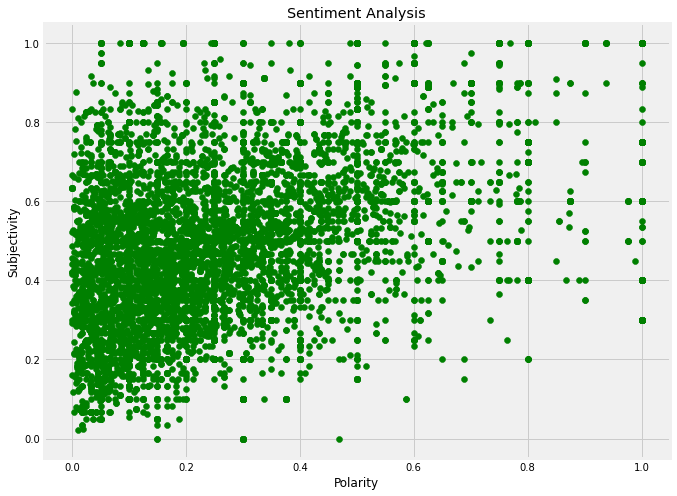

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(df['Polarity'][df['Sentiment'] == 'positive'],df['Subjectivity'][df['Sentiment'] == 'positive'],color='green')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**ScatterPlot**(For Negative Tweets)

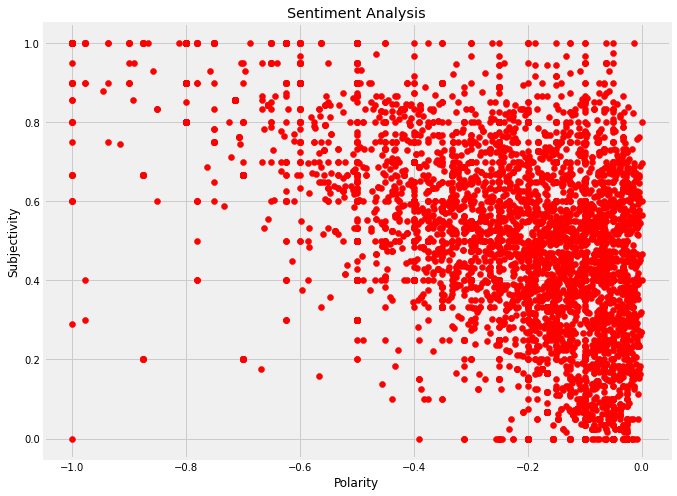

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(df['Polarity'][df['Sentiment'] == 'negative'],df['Subjectivity'][df['Sentiment'] == 'negative'],color='Red')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**Kernel Density Plot**

Text(0.5, 0, 'Polarity/Density')

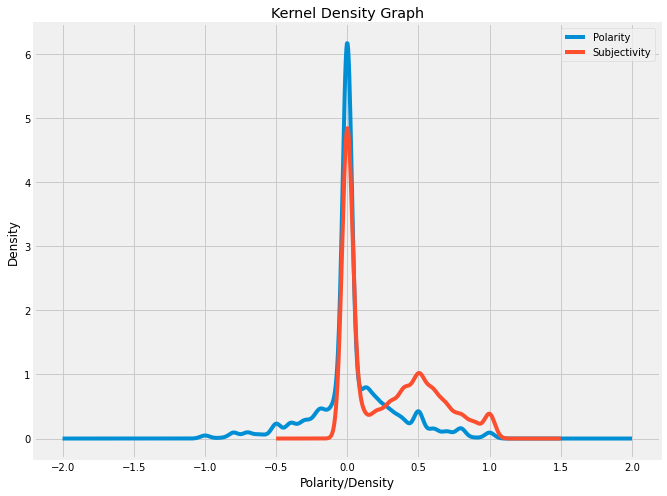

In [33]:
df.plot(kind = 'kde', figsize=(10, 8))
plt.title('Kernel Density Graph')
plt.xlabel('Polarity/Density')